### Tweet Spam Or Ham
- In this below dataset we are trying to load our tweets with the label of 0 as Ham and 1 as Spam, and we will try to apply some data cleaning and we will bulid one tweet spam and ham classfier.

### Importing Packages

In [24]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### Loading Dataset

In [3]:
df = pd.read_csv('train_tweet.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### Information of attributes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### 

### Splitting into Features and Labels

In [5]:
df_features = df.drop(['id','label'],axis=1)
df_label = df[['label']]
print(df_features.info())
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   31962 non-null  object
dtypes: object(1)
memory usage: 249.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   31962 non-null  int64
dtypes: int64(1)
memory usage: 249.8 KB
None


### Checking for N-Unique values in label

In [6]:
print(df_label.nunique())
print(df_label.value_counts())

label    2
dtype: int64
label
0        29720
1         2242
dtype: int64


## Data Cleaning & Preprocessing
### Applying Regular expression on Feature column (Tweet)
- Tweet data cleaning.
    - @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
    - @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.
- We have cleaned dataset tweet column using regular expression, and applied on tweet column and we have stored that on cleaned_tweet column

In [7]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove usernames
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (including emojis)
    return text

df_features['cleaned_tweet'] = df_features['tweet'].apply(clean_text)
print(df_features.head())

                                               tweet  \
0   @user when a father is dysfunctional and is s...   
1  @user @user thanks for #lyft credit i can't us...   
2                                bihday your majesty   
3  #model   i love u take with u all the time in ...   
4             factsguide: society now    #motivation   

                                       cleaned_tweet  
0  when a father is dysfunctional and is so selfi...  
1  thanks for lyft credit i can't use cause they ...  
2                                bihday your majesty  
3  model i love u take with u all the time in ur!...  
4                 factsguide: society now motivation  


### Feature Extraction (TF-IDF Vectorization)
- We are using vectorization to encode text to numerical dtype
- We have initialized TfidVectorized with max_features=2000 and stop_wrods='english', made an object as vectorizer and applied fit_transform() method on df_features['cleaned_tweet] as array.

In [8]:
vectorizer = TfidfVectorizer(max_features=2000,stop_words='english')
df_features_vectorized = vectorizer.fit_transform(df_features['cleaned_tweet']).toarray()

### Handling Imbalanced Data

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_features_vectorized,df_label)
print(len(X_resampled),len(y_resampled))
print(X_resampled.shape,y_resampled.shape)

59440 59440
(59440, 2000) (59440, 1)


### Train Test Split
-- Train test split we are passing two argument first is X variable as (df_features_vectorized) and second is (df_label), With transformation of Regular Expression and Vectorization on our feature column.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(47552, 2000) (11888, 2000)
(47552, 1) (11888, 1)


## Model Building & Evaluation

### Model Building

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
logistic_clf = LogisticRegression()

### KNN Cross Validation score
- Using Cross Validation score on KNN Classifier on X_train, y_train data with K-folds: 5 we are getting approx accuracy 93.96%

In [12]:
knn_clf_score = cross_val_score(estimator=knn_clf,X=X_train,y=y_train,scoring='accuracy',cv=5)
print(knn_clf_score.mean()) # Approx Accuracy: 66.29%

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ne

0.6629165122989475


### Logistic Reg. Cross Validation Score
- Using Cross Validation score on Logistic Reg. Classifier on X_train, y_train data with K-folds: 5 we are getting approx accuracy 95.01%

In [13]:
logistic_clf_score = cross_val_score(estimator=logistic_clf,X=X_train,y=y_train,scoring='accuracy',cv=5)
print(logistic_clf_score.mean()) # Approx Accuracy: 91.01%

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

0.9180686063765228


### KNN Cross Validation Prediction

In [14]:
knn_clf_ytrain_pred  = cross_val_predict(knn_clf,X=X_train,y=y_train,cv=5)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ne

### KNN Confusion Matrix

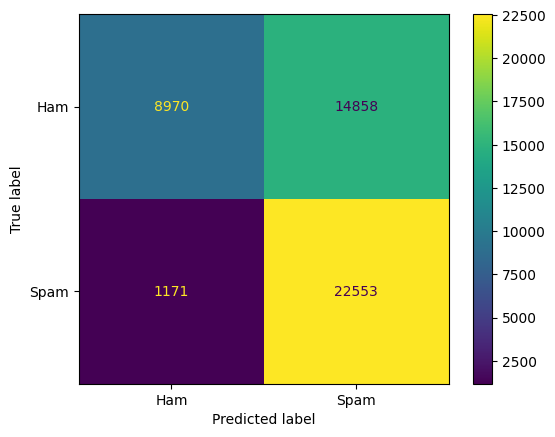

In [15]:
conf_matrix = confusion_matrix(y_true=y_train,y_pred=knn_clf_ytrain_pred)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Ham","Spam"])
conf_matrix_plot.plot()
plt.show()

### KNN Precision, Recall, F1 Scores

In [16]:
knn_precision_score = precision_score(y_true=y_train,y_pred=knn_clf_ytrain_pred)
knn_recall_score = recall_score(y_true=y_train,y_pred=knn_clf_ytrain_pred)
knn_f1_score = f1_score(y_true=y_train,y_pred=knn_clf_ytrain_pred)
print(knn_precision_score)
print(knn_recall_score)
print(knn_f1_score)

0.6028440832910107
0.9506407013994267
0.737809765273575


### Logistic Reg. Cross Validation Prediction

In [17]:
logistic_clf_ytrain_pred  = cross_val_predict(logistic_clf,X=X_train,y=y_train,cv=5)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

### Logistic Reg. Confusion Matrix

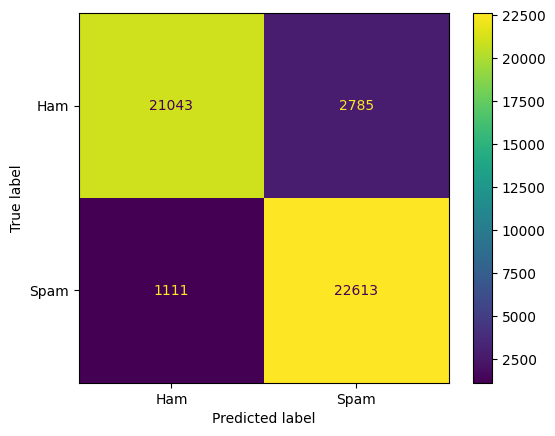

In [18]:
conf_matrix = confusion_matrix(y_true=y_train,y_pred=logistic_clf_ytrain_pred)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Ham","Spam"])
conf_matrix_plot.plot()
plt.show()

### Logistic Reg. Precision, Recall, F1 Scores

In [19]:
logistic_clf_precision_score = precision_score(y_true=y_train,y_pred=logistic_clf_ytrain_pred)
logistic_clf_recall_score = recall_score(y_true=y_train,y_pred=logistic_clf_ytrain_pred)
logistic_clf_f1_score = f1_score(y_true=y_train,y_pred=logistic_clf_ytrain_pred)
print(logistic_clf_precision_score)
print(logistic_clf_recall_score)
print(logistic_clf_f1_score)

0.8903456965115364
0.9531697858708481
0.9206872684336957


### Logistic Reg. Learning Curve
- As we are getting 92% of F1 scoring we have selected our model for this task which is Logistic Regression, now are checking whether my model has overfitted or not.

In [20]:
''' 
Due to lack of Memory we are unable to run this code but you could run this code by uncommeting this.
def plot_learning_curve(estimator,X,y):
     X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
     train_errors = []
     val_errors = []
     for m in range(1,len(X_train)):
         estimator.fit(X_train[:m],y_train[:m])
         y_train_pred = estimator.predict(X_train[:m])
         y_val_pred = estimator.predict(X_val)
         train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
         val_errors.append(mean_squared_error(y_val,y_val_pred))
    
     plt.figure(figsize=(12,12))
     plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train errors')
     plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='Validation errors')
     plt.legend()
     plt.show()

 plot_learning_curve(logistic_clf,X_train,y_train) 
 '''

" \nDue to lack of Memory we are unable to run this code but you could run this code by uncommeting this.\ndef plot_learning_curve(estimator,X,y):\n     X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)\n     train_errors = []\n     val_errors = []\n     for m in range(1,len(X_train)):\n         estimator.fit(X_train[:m],y_train[:m])\n         y_train_pred = estimator.predict(X_train[:m])\n         y_val_pred = estimator.predict(X_val)\n         train_errors.append(mean_squared_error(y_train[:m],y_train_pred))\n         val_errors.append(mean_squared_error(y_val,y_val_pred))\n    \n     plt.figure(figsize=(12,12))\n     plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train errors')\n     plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='Validation errors')\n     plt.legend()\n     plt.show()\n\n plot_learning_curve(logistic_clf,X_train,y_train) \n "

### Fine Tuning Logistic Reg. model

In [21]:
param_grid = {
    'penalty': ['l1', 'l2'],          
    'C': [0.001, 0.01, 0.1, 1, 10, 100],         
    'random_state': [42]               
}

logistic_grid_search = GridSearchCV(estimator=logistic_clf,param_grid=param_grid,cv=3,scoring='accuracy')
logistic_grid_search.fit(X_train,y_train)
print(logistic_grid_search.best_params_) # Getting best parameter combination
print(logistic_grid_search.best_score_) # Getting best score 
print(logistic_grid_search.best_estimator_) # Getting best estimator

# Evaluating Grid Scores
cvres = logistic_grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(mean_score,params)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

{'C': 100, 'penalty': 'l2', 'random_state': 42}
0.9315065554283413
LogisticRegression(C=100, random_state=42)
nan {'C': 0.001, 'penalty': 'l1', 'random_state': 42}
0.7795675925537111 {'C': 0.001, 'penalty': 'l2', 'random_state': 42}
nan {'C': 0.01, 'penalty': 'l1', 'random_state': 42}
0.8474722084957703 {'C': 0.01, 'penalty': 'l2', 'random_state': 42}
nan {'C': 0.1, 'penalty': 'l1', 'random_state': 42}
0.8928962065969096 {'C': 0.1, 'penalty': 'l2', 'random_state': 42}
nan {'C': 1, 'penalty': 'l1', 'random_state': 42}
0.9150824452822057 {'C': 1, 'penalty': 'l2', 'random_state': 42}
nan {'C': 10, 'penalty': 'l1', 'random_state': 42}
0.9276371289123123 {'C': 10, 'penalty': 'l2', 'random_state': 42}
nan {'C': 100, 'penalty': 'l1', 'random_state': 42}
0.9315065554283413 {'C': 100, 'penalty': 'l2', 'random_state': 42}


c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Fitting Final Model test set

In [25]:
final_model = logistic_grid_search.best_estimator_
y_test_final_pred = final_model.predict(X_test) # Fitting model on Test set.clear
acc_score = accuracy_score(y_true=y_test,y_pred=y_test_final_pred)
class_report = classification_report(y_true=y_test,y_pred=y_test_final_pred)
print('Final Accuracy on Logistic Reg. Classifier:', acc_score)
print(class_report)

Final Accuracy on Logistic Reg. Classifier: 0.9369952893674294
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      5892
           1       0.91      0.97      0.94      5996

    accuracy                           0.94     11888
   macro avg       0.94      0.94      0.94     11888
weighted avg       0.94      0.94      0.94     11888



### `Note:` Machine learning end to end project has done for Tweet Spam Or Ham for more projects visit: www.github.com/itechdp